In [5]:
import numpy

In [6]:
def eqsc(X, K=None, G=None):
    "equal-size clustering based on data exchanges between pairs of clusters"
    from scipy.spatial.distance import pdist, squareform
    from matplotlib import pyplot as plt
    from matplotlib import animation as ani    
    from matplotlib.patches import Polygon   
    from matplotlib.collections import PatchCollection
    def error(K, m, D):
        """return average distances between data in one cluster, averaged over all clusters"""
        E = 0
        for k in range(K):
            i = numpy.where(m == k)[0] # indices of datapoints belonging to class k
            E += numpy.mean(D[numpy.meshgrid(i,i)])
        return E / K
    numpy.random.seed(0) # repeatability
    N, n = X.shape
    if G is None and K is not None:
        G = N // K # group size
    elif K is None and G is not None:
        K = N // G # number of clusters
    else:
        raise Exception('must specify either K or G')
    D = squareform(pdist(X)) # distance matrix
    m = numpy.random.permutation(N) % K # initial membership
    E = error(K, m, D)
    # visualization
    #FFMpegWriter = ani.writers['ffmpeg']
    #writer = FFMpegWriter(fps=15)
    #fig = plt.figure()
    #with writer.saving(fig, "ec.mp4", 100):
    t = 1
    while True:
        E_p = E
        for a in range(N): # systematically
            for b in range(a):
                m[a], m[b] = m[b], m[a] # exchange membership
                E_t = error(K, m, D)
                if E_t < E:
                    E = E_t
                    print("{}: {}<->{} E={}".format(t, a, b, E))
                    #plt.clf()
                    #for i in range(N):
                        #plt.text(X[i,0], X[i,1], m[i])
                    #writer.grab_frame()
                else:
                    m[a], m[b] = m[b], m[a] # put them back
        if E_p == E:
            break
        t += 1           
    fig, ax = plt.subplots()
    patches = []
    for k in range(K):
        i = numpy.where(m == k)[0] # indeces of datapoints belonging to class k
        x = X[i]        
        patches.append(Polygon(x[:,:2], True)) # how to draw this clock-wise?
        u = numpy.mean(x, 0)
        plt.text(u[0], u[1], k)
    p = PatchCollection(patches, alpha=0.5)        
    ax.add_collection(p)
    plt.show()



1: 1<->0 E=0.331901262619
1: 2<->0 E=0.323944186922
1: 3<->2 E=0.321581861527
1: 4<->0 E=0.320931618539
1: 5<->0 E=0.318690194575
1: 5<->3 E=0.31621709875
1: 6<->0 E=0.315340904871
1: 8<->0 E=0.312145871443
1: 8<->2 E=0.311556896303
1: 9<->0 E=0.301377919246
1: 9<->2 E=0.299867885787
1: 9<->3 E=0.299683803792
1: 11<->6 E=0.299556509941
1: 13<->5 E=0.297992853094
1: 15<->2 E=0.293938956219
1: 15<->3 E=0.292339778262
1: 16<->3 E=0.289976230184
1: 17<->4 E=0.28929007654
1: 18<->5 E=0.288320305883
1: 18<->6 E=0.285409375445
1: 19<->11 E=0.282386764149
1: 20<->3 E=0.280548754651
1: 20<->15 E=0.278786170992
1: 21<->6 E=0.278700903456
1: 21<->10 E=0.276235648794
1: 22<->2 E=0.272908081993
1: 22<->3 E=0.272450863
1: 22<->6 E=0.271773107843
1: 22<->7 E=0.271316215943
1: 22<->17 E=0.266620328773
1: 23<->0 E=0.265560754707
1: 25<->2 E=0.264181494592
1: 25<->3 E=0.263059992643
1: 25<->5 E=0.262109491372
1: 25<->10 E=0.261641073897
1: 26<->6 E=0.260044157603
1: 26<->21 E=0.259435632339
1: 27<->2 E=

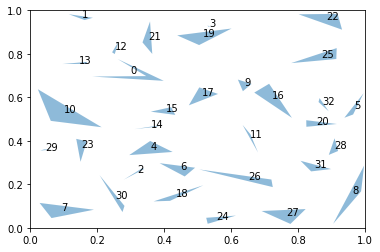

In [7]:
if __name__ == "__main__":
    N, n = 100, 2    
    X = numpy.random.rand(N, n)
    eqsc(X, G=3)

In [8]:
N, n = 100, 2    
X = numpy.random.rand(N, n)